Installation des modules suivants avec %pip install:
- openpyxl 
- pandas
- numpy
- matplotlib
- seaborn

Importation des librairies de bases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importation des fonctions
from attrition_utils import*

Importation du jeu de données

In [3]:
df = pd.read_excel('Donnees.xlsx')

In [4]:
pd.set_option('display.max_column', 32)

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


Structure de la base de données

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

Nous avons 1470 observations dans la base;
Pas de valeurs manquantes;
La base de données a 32 variables

Nous constatons que nous avons 24 variables de type entier et 8 variables de type catégoriel

In [7]:
dict_data = pd.read_excel('dict_data.xlsx')
dict_data

,Variable,Description,Type
0,Age,Age,Numeric
1,Attrition,Attrition,Categorielle
2,BusinessTravel,Fréquence Voyage/Mission,Numeric
3,DailyRate,Durée journalière au travail,Numeric
4,Department,Departement,Categorielle
5,DistanceFromHome,Distance de la maison au Travail,Numeric
6,Education,Niveau d'éducation,Categorielle
7,EducationField,Filière,Categorielle
8,EmployeeNumber,Matricule,Categorielle
9,EnvironmentSatisfaction,Niveau d'appreciation/satisfaction de l'enviro...,Categorielle


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.00,3.0,4.00,4.0


Statistiques univariées

Tableau de comptage des valeurs avec pourcentages pour la variable 'Attrition':

           Comptage  Pourcentage (%)
Attrition                           
No             1233            83.88
Yes             237            16.12




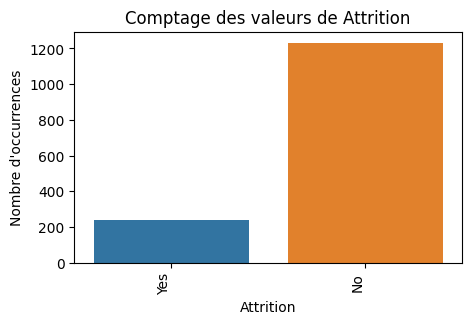

Tableau de comptage des valeurs avec pourcentages pour la variable 'BusinessTravel':

                   Comptage  Pourcentage (%)
BusinessTravel                              
Travel_Rarely          1043            70.95
Travel_Frequently       277            18.84
Non-Travel              150            10.20




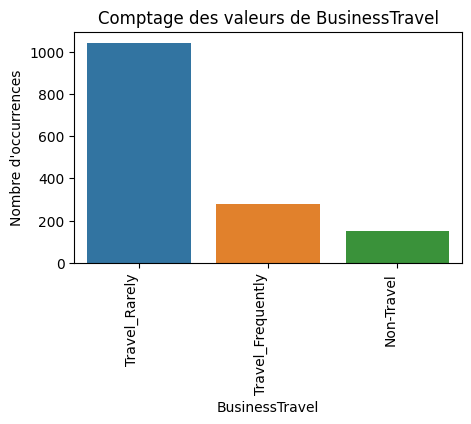

Tableau de comptage des valeurs avec pourcentages pour la variable 'Department':

                        Comptage  Pourcentage (%)
Department                                       
Research & Development       961            65.37
Sales                        446            30.34
Human Resources               63             4.29




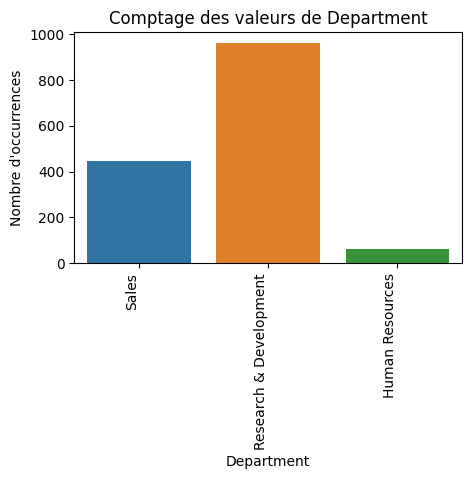

Tableau de comptage des valeurs avec pourcentages pour la variable 'EducationField':

                  Comptage  Pourcentage (%)
EducationField                             
Life Sciences          606            41.22
Medical                464            31.56
Marketing              159            10.82
Technical Degree       132             8.98
Other                   82             5.58
Human Resources         27             1.84




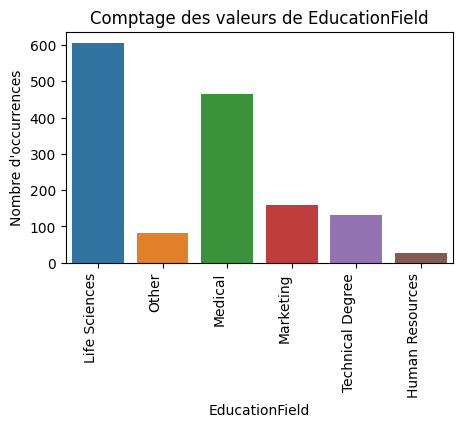

Tableau de comptage des valeurs avec pourcentages pour la variable 'Gender':

        Comptage  Pourcentage (%)
Gender                           
Male         882             60.0
Female       588             40.0




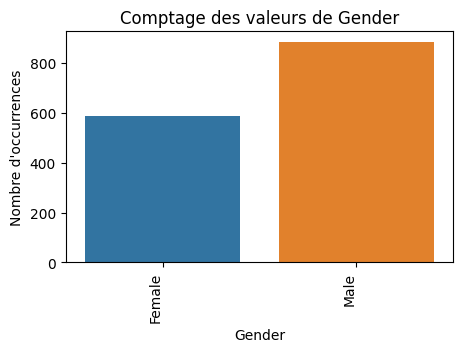

Tableau de comptage des valeurs avec pourcentages pour la variable 'JobRole':

                           Comptage  Pourcentage (%)
JobRole                                             
Sales Executive                 326            22.18
Research Scientist              292            19.86
Laboratory Technician           259            17.62
Manufacturing Director          145             9.86
Healthcare Representative       131             8.91
Manager                         102             6.94
Sales Representative             83             5.65
Research Director                80             5.44
Human Resources                  52             3.54




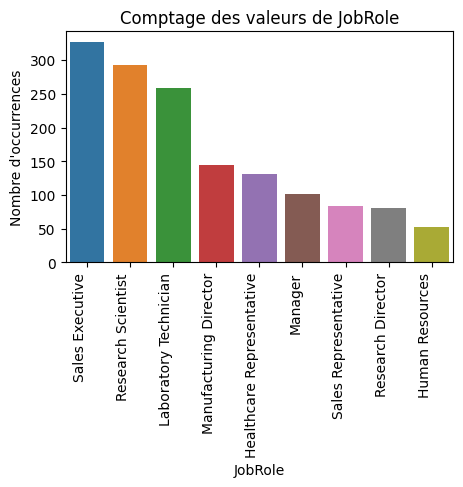

Tableau de comptage des valeurs avec pourcentages pour la variable 'MaritalStatus':

               Comptage  Pourcentage (%)
MaritalStatus                           
Married             673            45.78
Single              470            31.97
Divorced            327            22.24




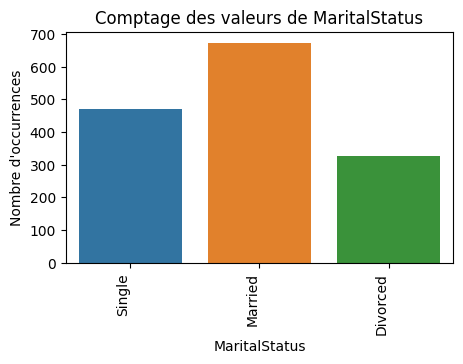

Tableau de comptage des valeurs avec pourcentages pour la variable 'OverTime':

          Comptage  Pourcentage (%)
OverTime                           
No            1054             71.7
Yes            416             28.3




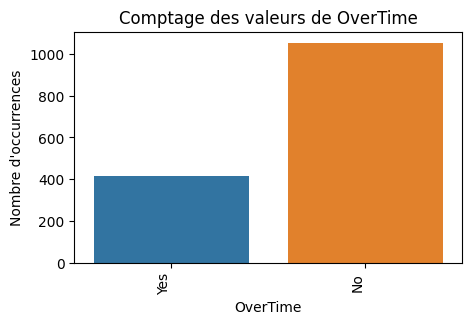

In [9]:
univariate_statistics(df)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


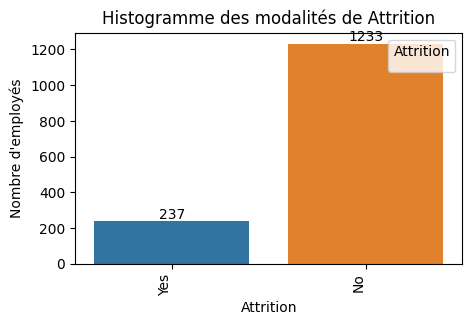

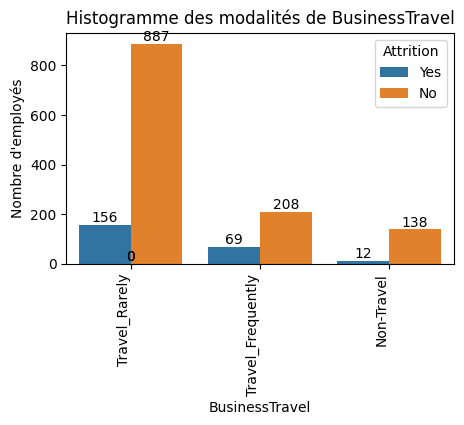

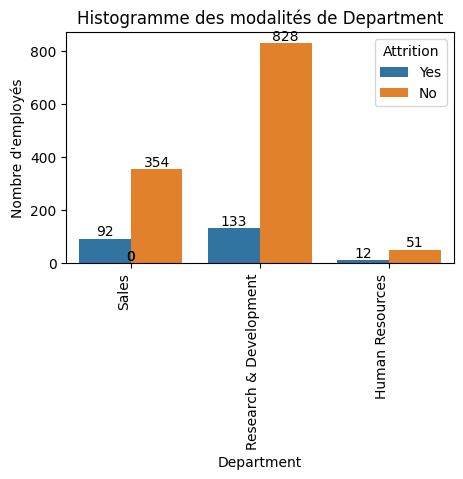

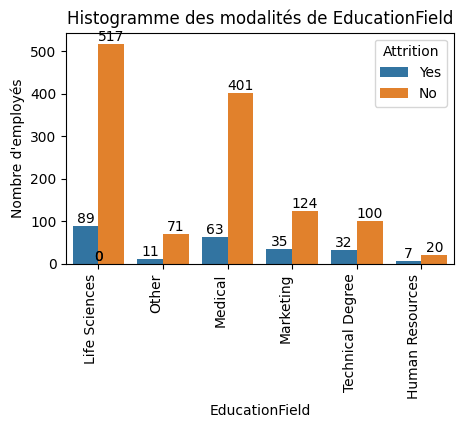

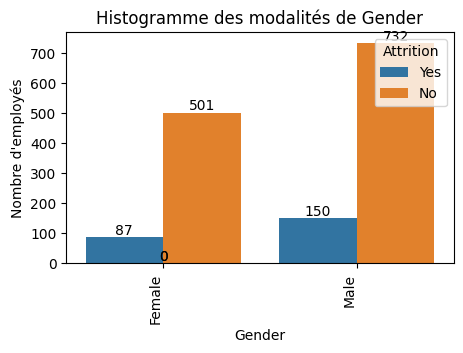

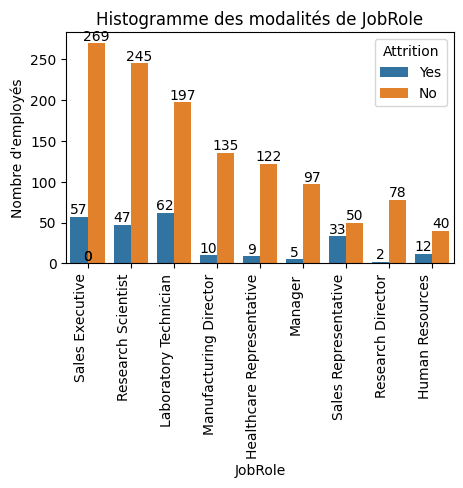

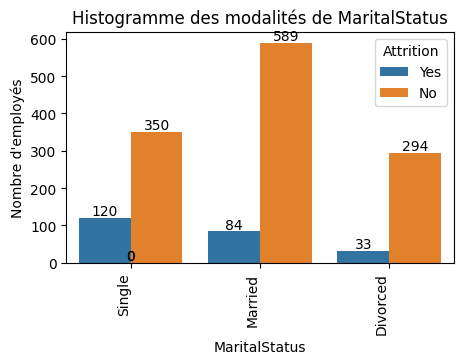

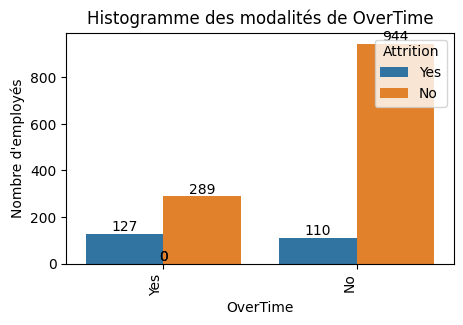

In [10]:
bivariate_statistics(df)

Nous constatons que les employés qui bénéficient très rarement des missions sont plus nombreux et globalement, cela semble ne pas constituer la raison pour laquelle ceux-ci démissionnent. Cependant, pour l'ensemble de l'effectif des employés ayant démissionné, nous observons plus de 65% de ceux ayant démissionné, soit 156 employés, proviennent de la catégorie qui voyagent très rarement.

Plus de la moitié des employés ayant démissionné, soit 56% (133 employés) provient du département "Research & development". De l'effectif restant des démissionnés, soit 104 employés, 88% est issu du département des ventes (92 employés). 

Les employés dont les profils relèvent du Médical et des Sciences de la vie sont ceux qui démissionnent le plus par rapport aux autres. ceux des Sciences de la vie représentent 37.5% du total des employés ayant démissionné et ceux du Médical représentent 26.5%. 

Nous constatons aisément que les employés de sexe masculin sont ceux qui démissionnent le plus. soit un peu plus de 63% de l'ensemble des employés ayant démissionné.

Les heures supplémentaires semblent ne pas influer sur la décision d'un employé de démissionner. Nous observons qu'il y a une quasi équiprobabilité de démission entre les employés ayant effectué les heures supplémentaires et ceux ne l'ayant pas effectué.

In [11]:
numeric_df = select_numeric_columns(df)
numeric_df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,2,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,5,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,7,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2


Matrice des corrélations

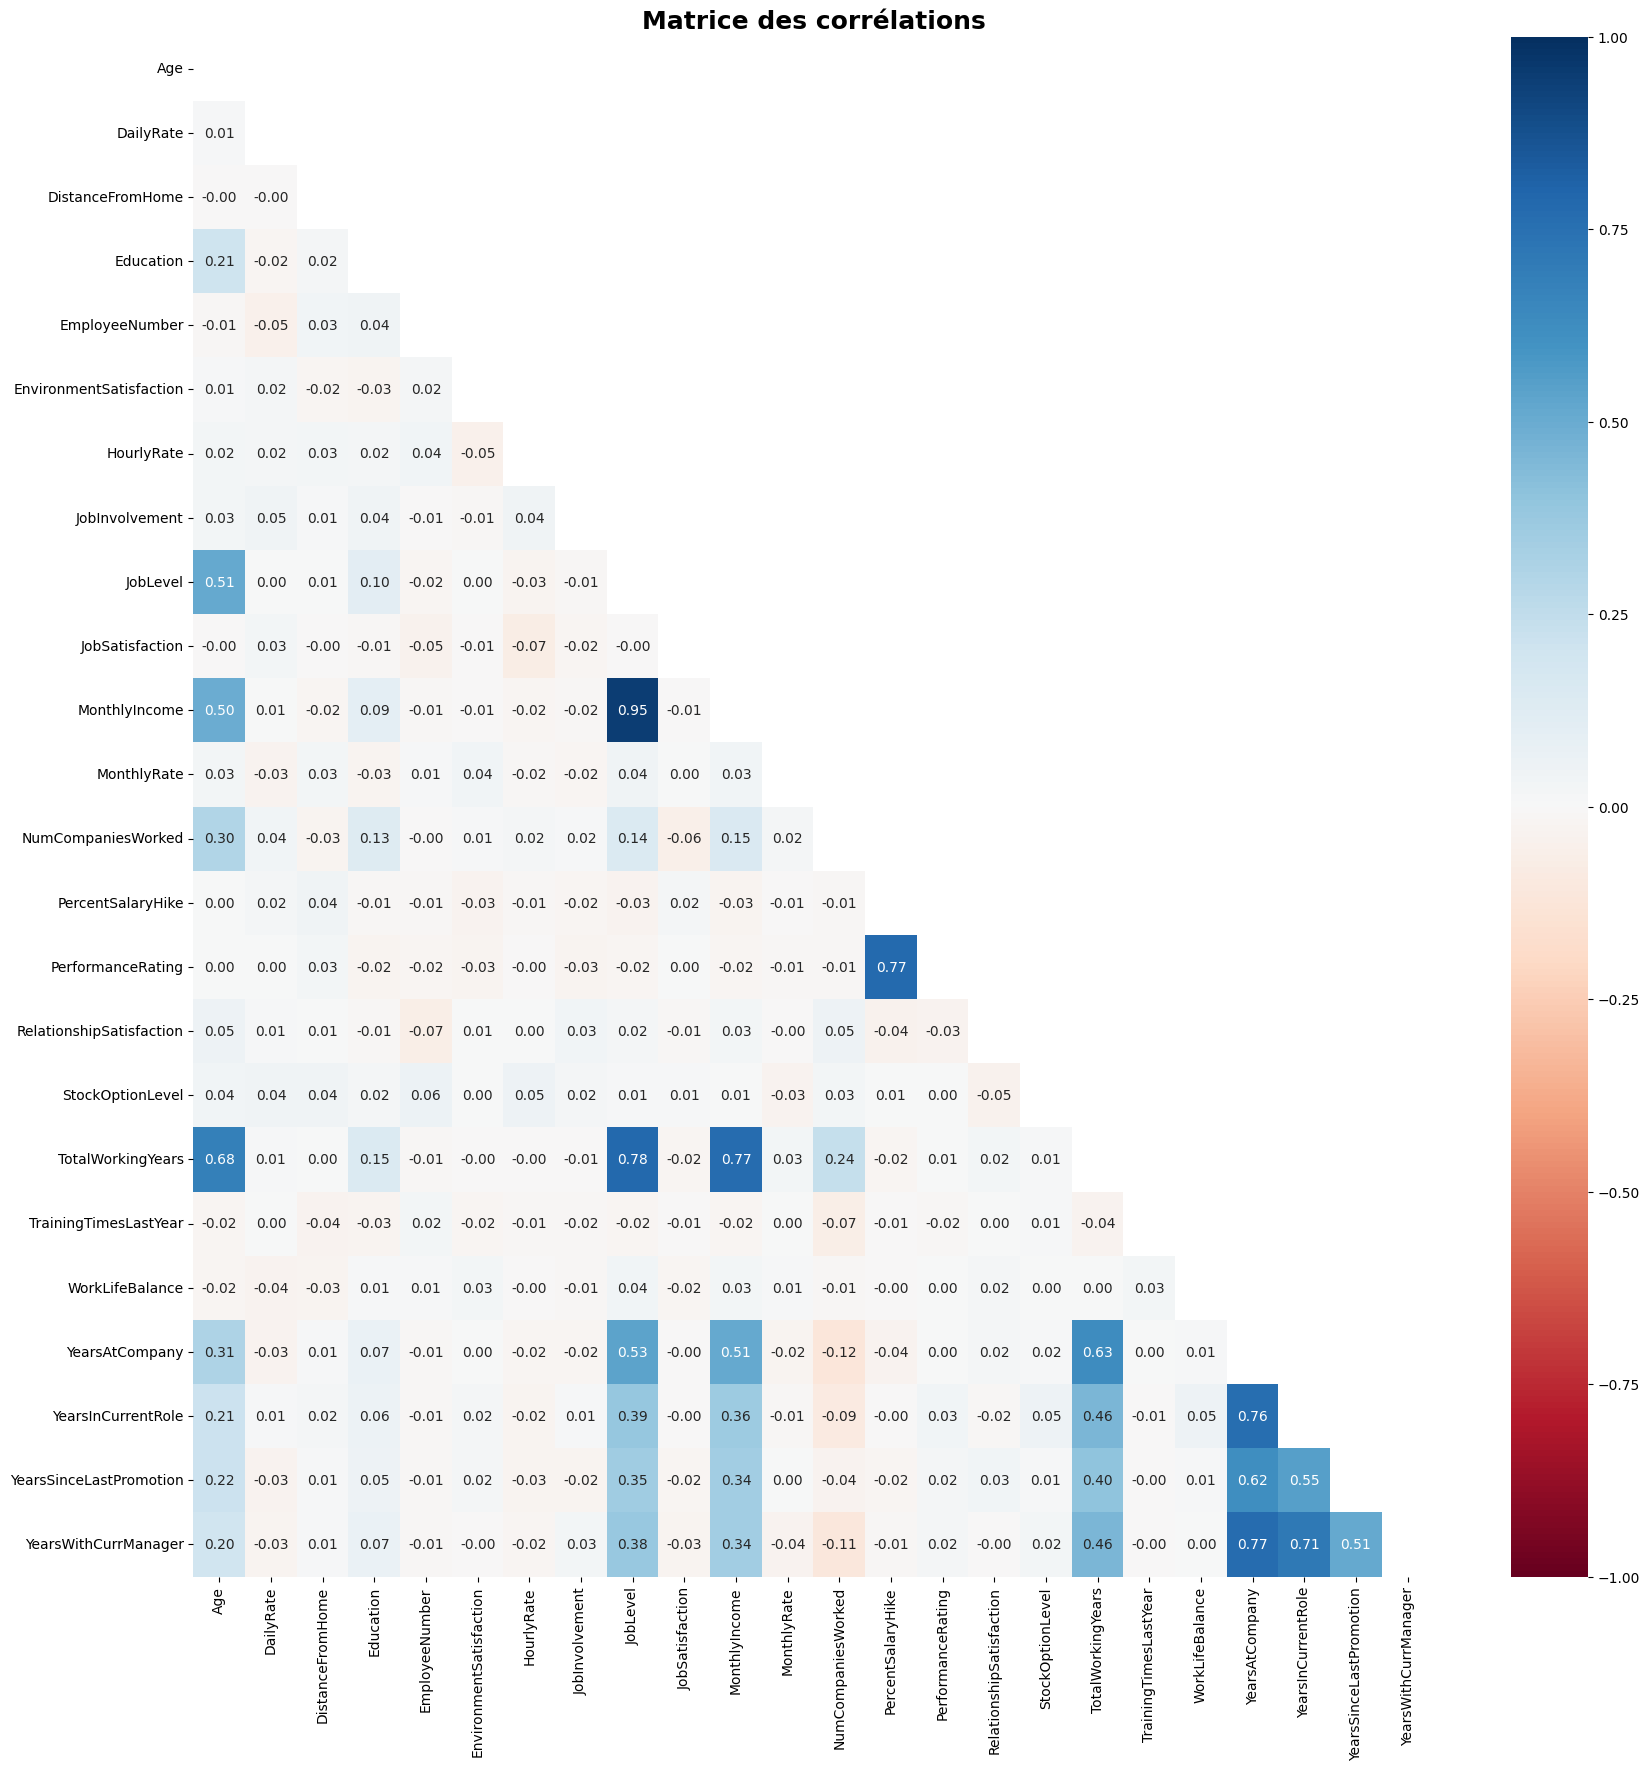

In [12]:
plot_correlation_matrix(numeric_df)

Les conclusions sont basées sur l'analyse exploratoire précédente. Nous avons observé que le jeu de données est "propre", sans valeurs manquantes. Cependant, nous avons remarqué que les échelles varient entre les variables numériques, comme le montre le tableau descriptif des statistiques, notamment en termes d'écart-type. Cette disparité peut potentiellement affecter la performance du modèle de Machine Learning à créer, donc une standardisation/normalisation des données sera effectuée ultérieurement pour y remédier. Nous avons également constaté une forte corrélation (plus de 90%) entre la variable "Revenu mensuel" et la variable "Grade", ce qui est logique : un niveau hiérarchique plus élevé dans l'entreprise (IBM) est associé à un revenu mensuel plus élevé. Enfin, il est important de noter un déséquilibre significatif entre les employés ayant démissionné et ceux qui ne l'ont pas fait. Le ratio calculé est d'environ 20% (237 démissions sur 1233 employés). Il sera nécessaire de garantir que ce même ratio soit appliqué lors de la division du jeu de données en base d'entraînement et de test.

Boxplots

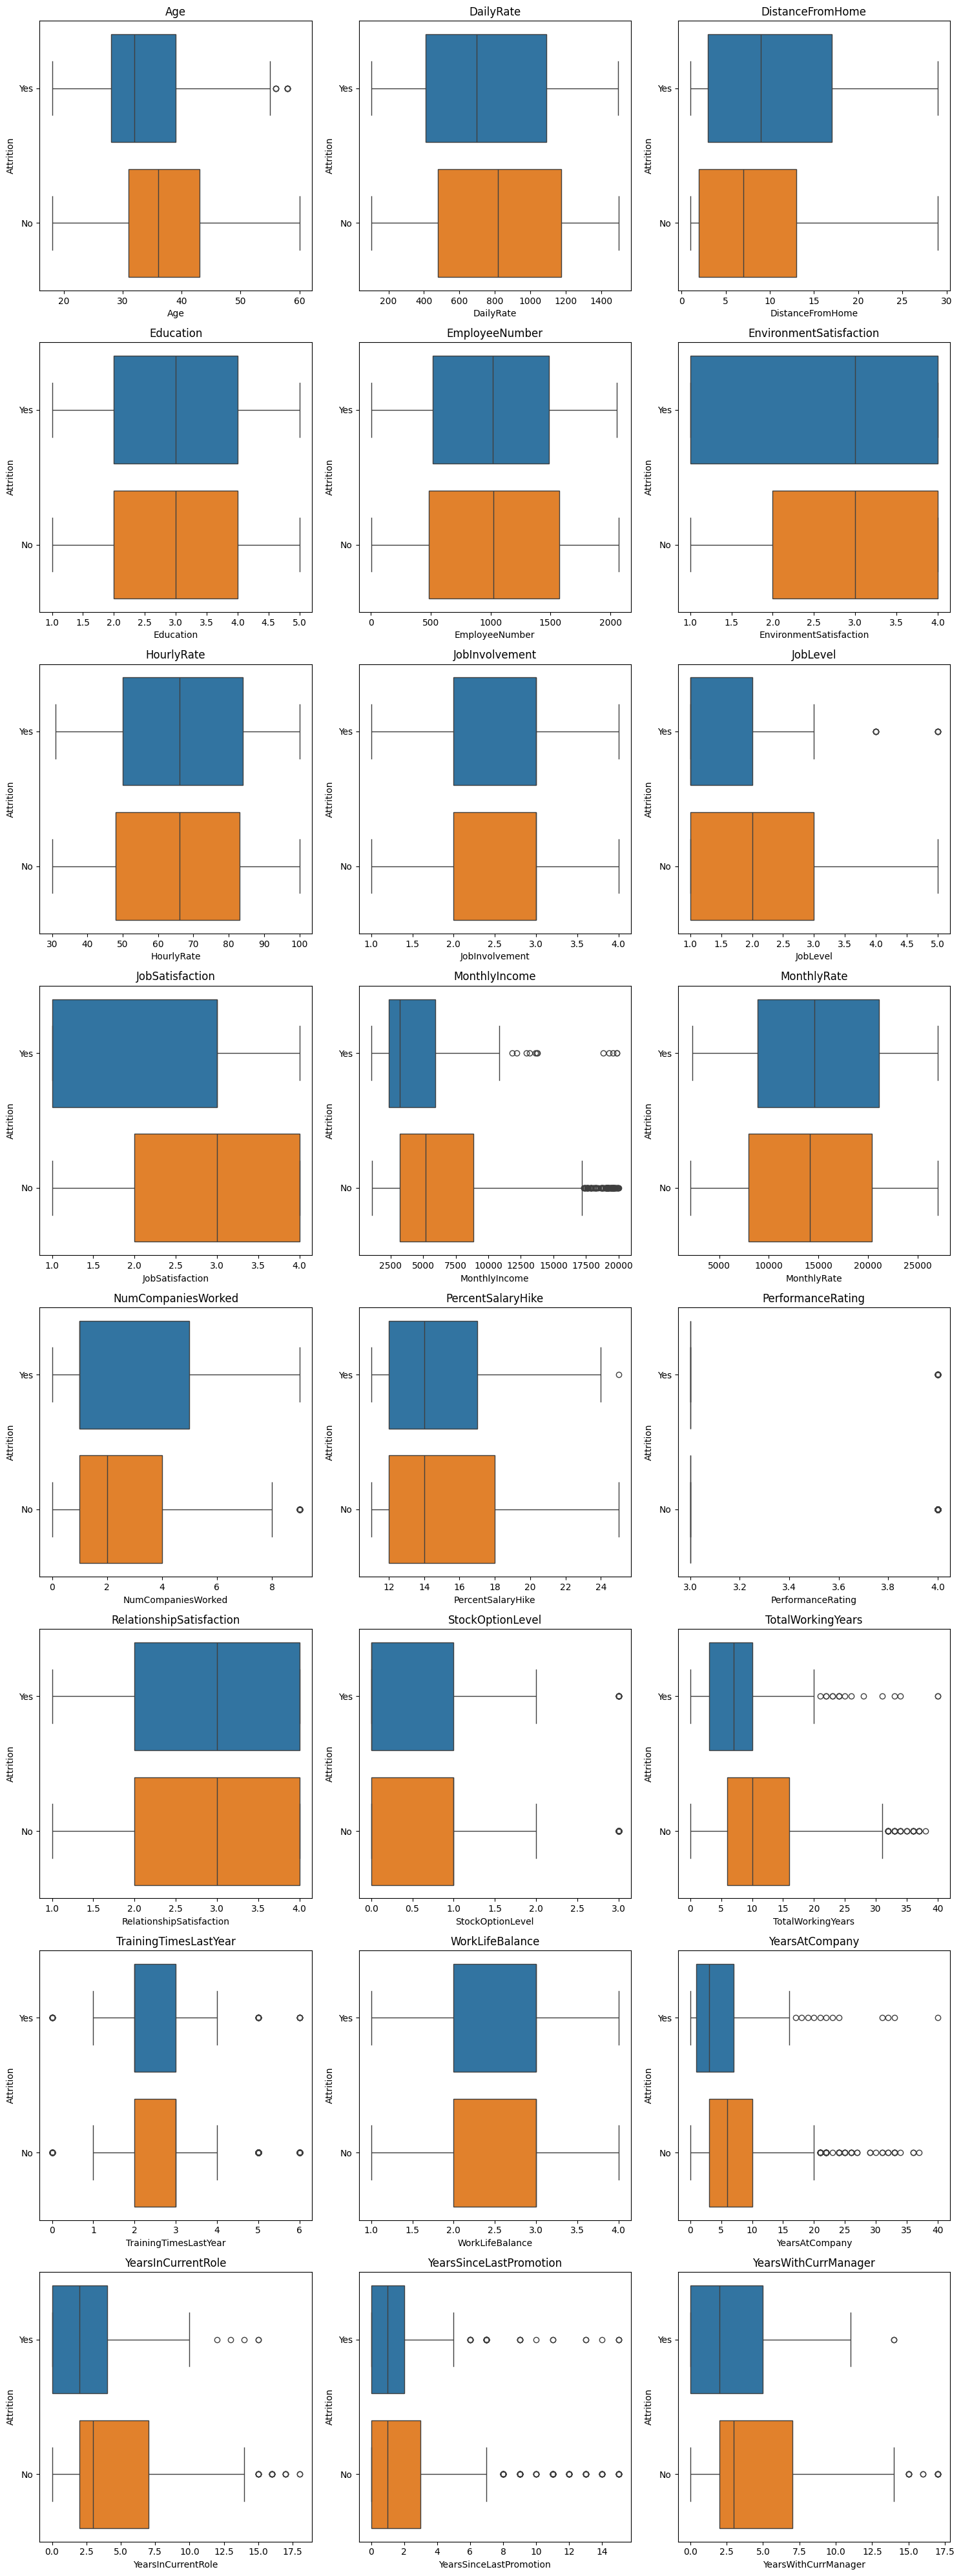

In [13]:
boxplot_numeric_variables(df)

Elimination des outliers

In [14]:
remove_outliers(df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8.0,Yes,11,3.0,1,0.0,8.0,0.5,1,6.0,4.0,0.0,5.0
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1.0,No,23,3.0,4,1.0,10.0,3.0,3,10.0,7.0,1.0,7.0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6.0,Yes,15,3.0,2,0.0,7.0,3.0,3,0.0,0.0,0.0,0.0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1.0,Yes,11,3.0,3,0.0,8.0,3.0,3,8.0,7.0,3.0,0.0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,8.5,No,12,3.0,4,1.0,6.0,3.0,3,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571.0,12290,4.0,No,17,3.0,3,1.0,17.0,3.0,3,5.0,2.0,0.0,3.0
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991.0,21457,4.0,No,15,3.0,1,1.0,9.0,4.5,3,7.0,7.0,1.0,7.0
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142.0,5174,1.0,Yes,20,3.0,2,1.0,6.0,0.5,3,6.0,2.0,0.0,3.0
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,Male,63,2,2,Sales Executive,2,Married,5390.0,13243,2.0,No,14,3.0,4,0.0,17.0,3.0,2,9.0,6.0,0.0,8.0


Vérification des outliers

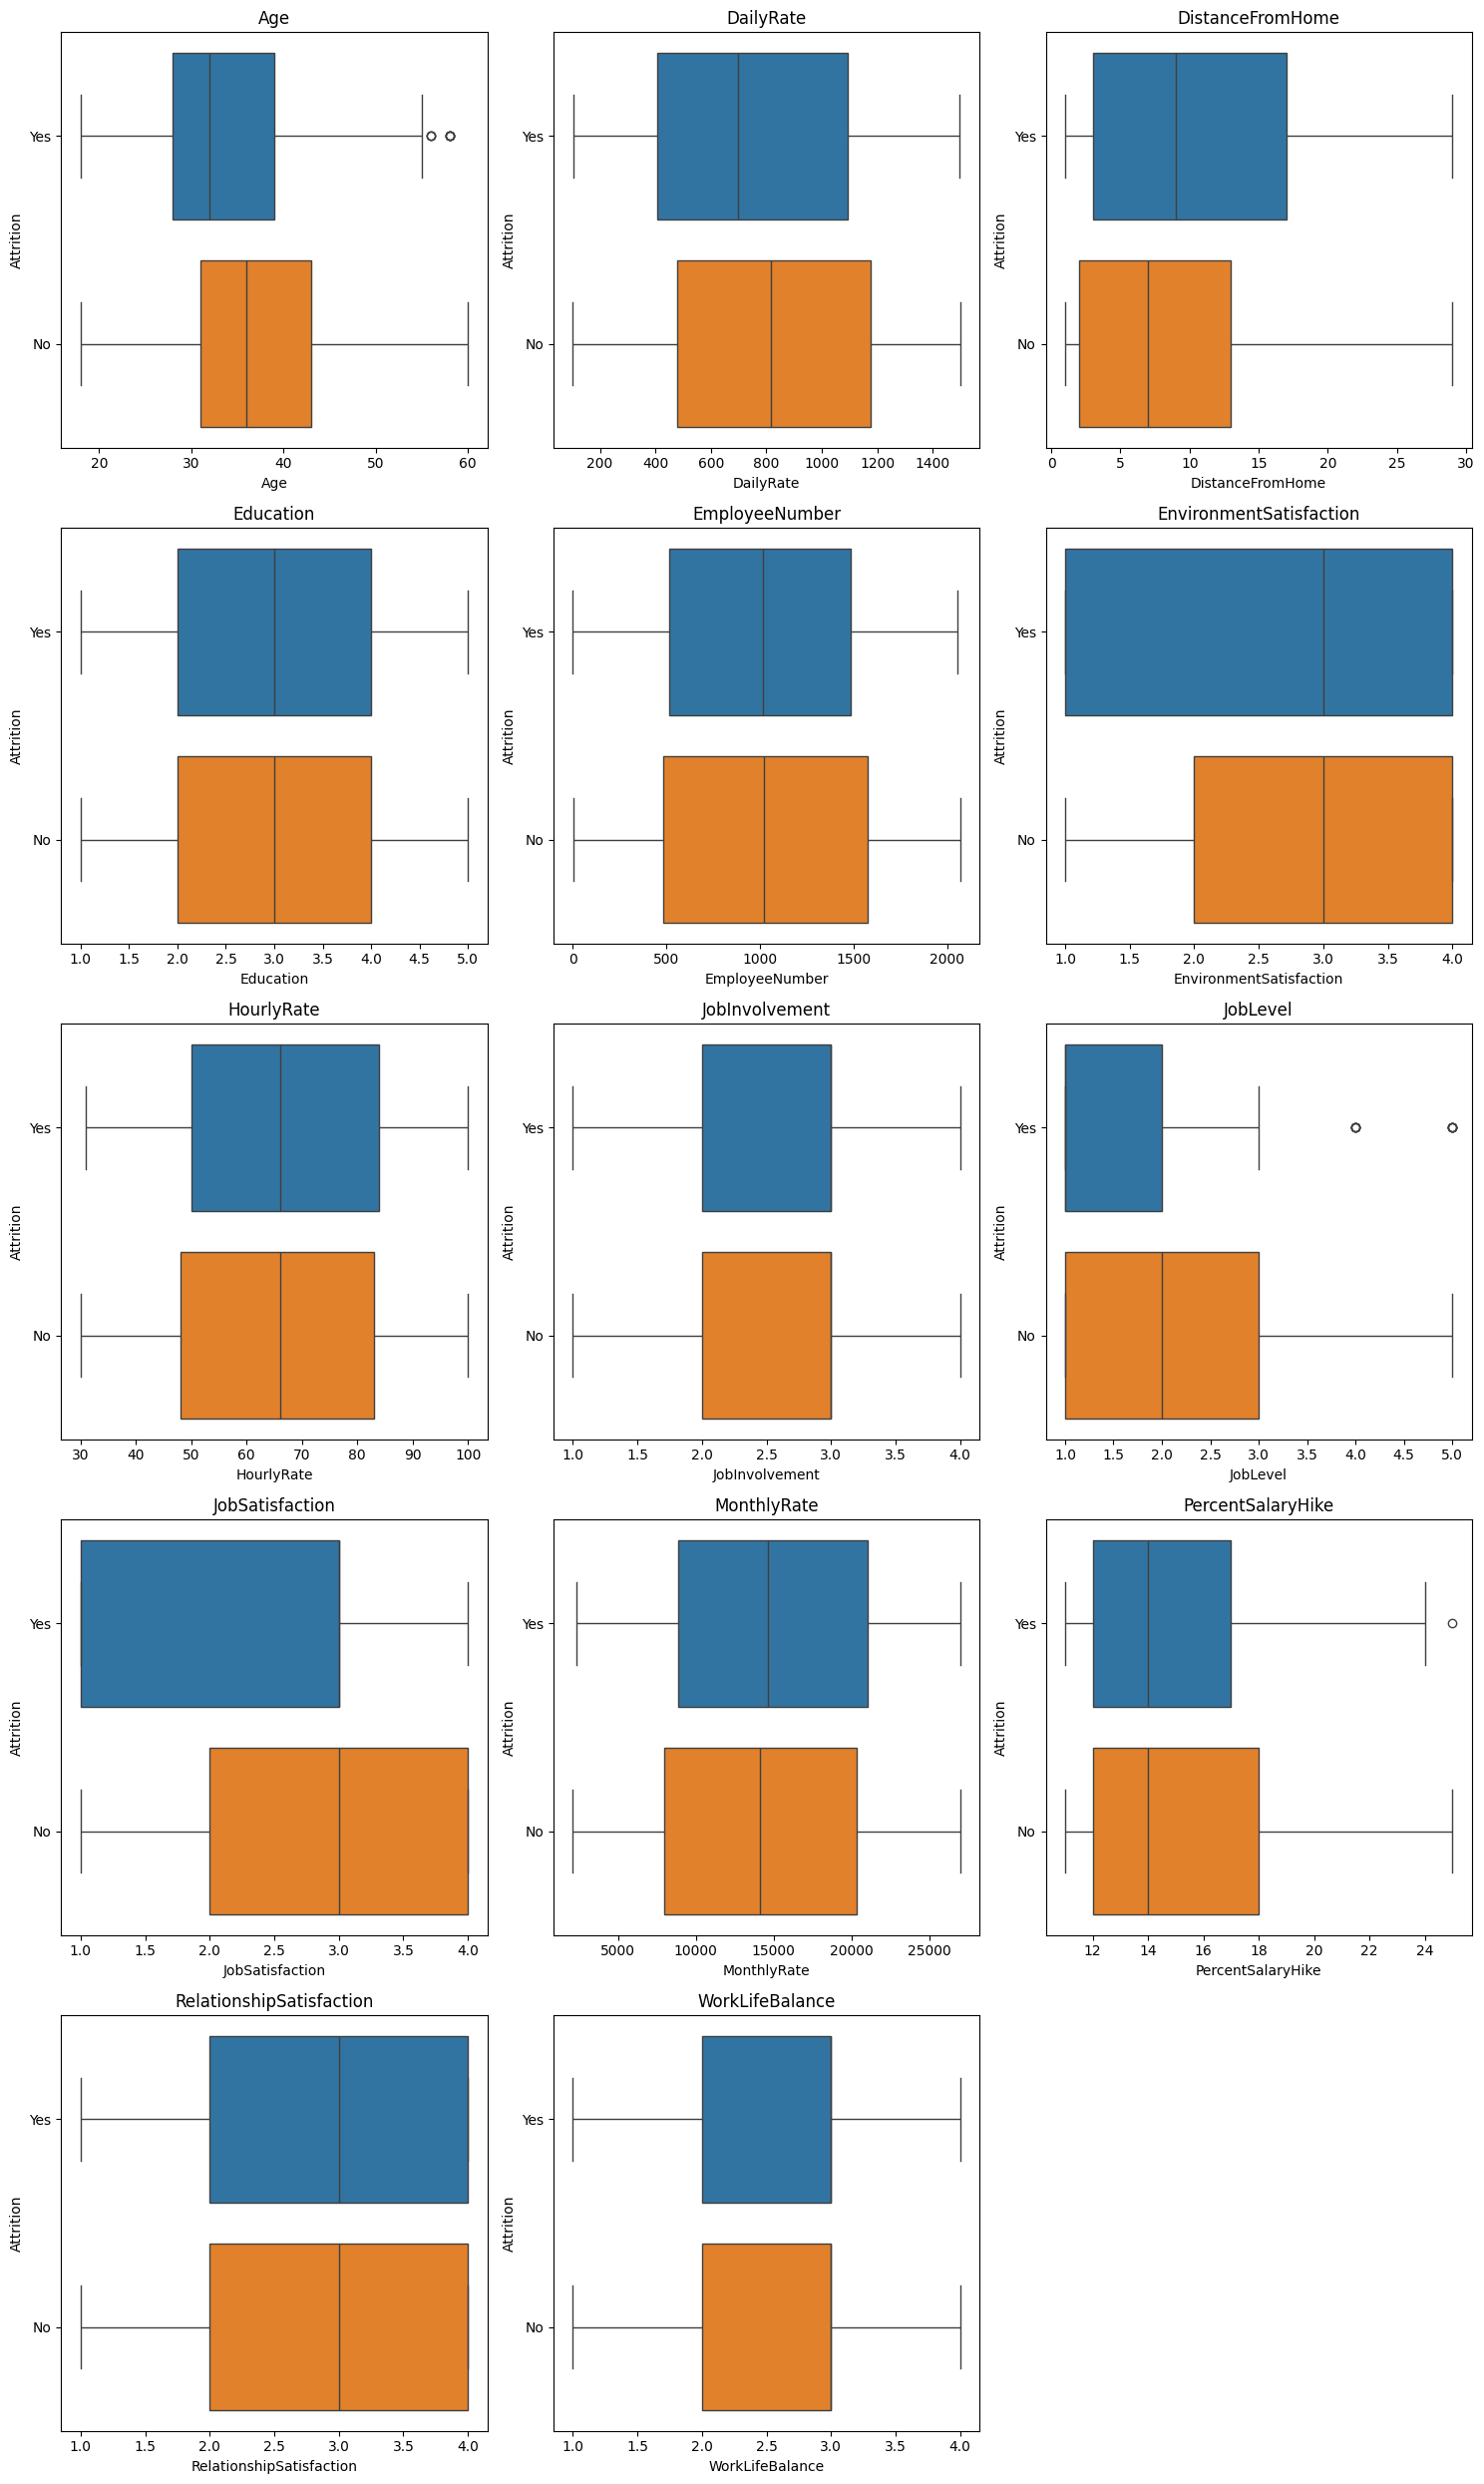

In [15]:
boxplot_numeric_variables(df)

In [16]:
categorical_variables(df)

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [17]:
cat_vars = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

PREPROCESSING

In [18]:
num_vars = numerical_variables(df)
num_vars

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyRate',
 'PercentSalaryHike',
 'RelationshipSatisfaction',
 'WorkLifeBalance']

MACHINE LEARNING

In [19]:
# Séparation de la variable expliquée Y des variables explicatives X
X = df.drop('Attrition', axis = 1)
y = df['Attrition']

seed = 42

In [20]:
# Séparation des données d'entrainement, de validation et de test
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state = seed, stratify = y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = seed, stratify = y_temp)

In [21]:
# Dimensions des datasets
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(882, 31) (882,)
(294, 31) (294,)
(294, 31) (294,)


In [22]:
# Distribution des classes
print(y.value_counts(normalize=True).values)
print(y_train.value_counts(normalize=True).values)
print(y_test.value_counts(normalize=True).values)
print(y_val.value_counts(normalize=True).values)

[0.83877551 0.16122449]
[0.83900227 0.16099773]
[0.84013605 0.15986395]
[0.83673469 0.16326531]


SELECTION DES VARIABLES

MODELISATION - EVALUATIONS ET CHOIX MEILLEUR MODELE

Metriques pour La Regression Logistique:
              precision    recall  f1-score   support

          No       0.89      0.95      0.92       247
         Yes       0.60      0.38      0.47        47

    accuracy                           0.86       294
   macro avg       0.75      0.67      0.69       294
weighted avg       0.84      0.86      0.85       294



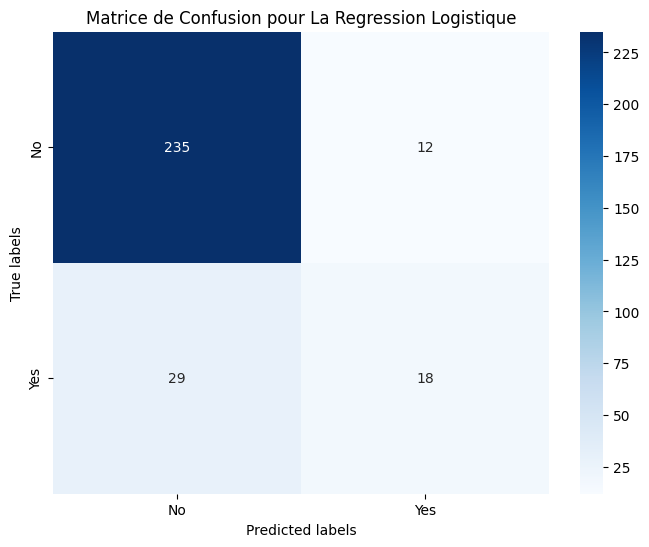

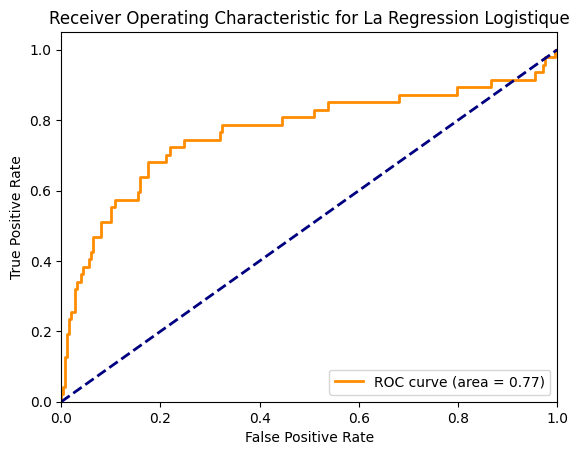

Metriques pour La Forêt Aléatoire:
              precision    recall  f1-score   support

          No       0.86      0.98      0.92       247
         Yes       0.62      0.17      0.27        47

    accuracy                           0.85       294
   macro avg       0.74      0.57      0.59       294
weighted avg       0.82      0.85      0.81       294



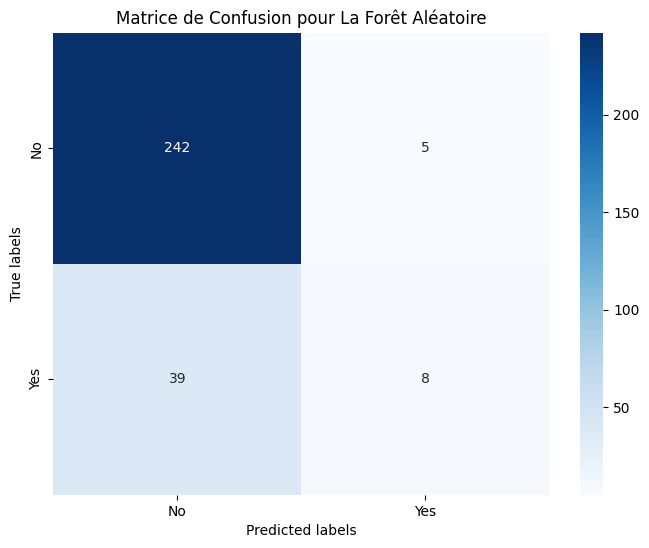

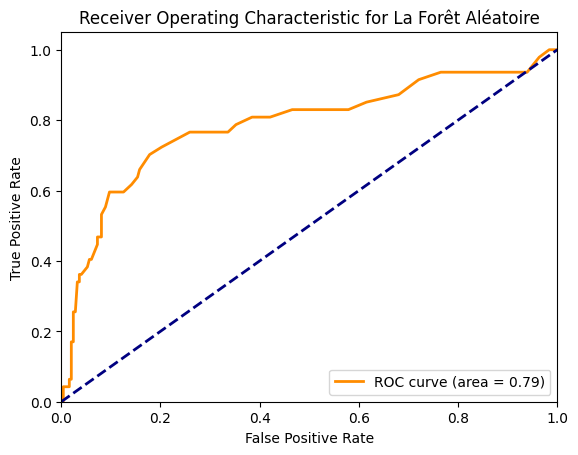

Best Model: La Forêt Aléatoire


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import time

# Appel de la fonction modelling
best_model, model_acc, model_time = modelling(X_train, y_train, X_val, y_val, X_test, y_test, num_vars, cat_vars)